In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import math
import statsmodels.api as sm

In [47]:
import warnings
warnings.filterwarnings('ignore')

**Carregamento dos dados**

In [48]:
dataprueba = pd.read_csv('datasetProyFinal.csv')

In [83]:
dataprueba

,Dia,ORSC,WRSC,GRSC,WBHP
0,30.00,6075.300751,0.031739,2623866.348,55231.08026
1,31.00,6448.879711,0.051689,2730762.197,59271.03132
2,32.00,6149.788930,0.068532,2657529.883,58595.34687
3,33.00,6413.192888,0.069360,2770661.051,56996.03348
4,34.00,6179.624600,0.076237,2630960.015,56637.69132
...,...,...,...,...,...
3118,3041.00,5128.181653,15.984407,2195449.651,53006.78620
3119,3042.00,4664.154912,17.763168,2122466.749,52588.06551
3120,3042.99,4815.533061,15.866238,2188141.473,54156.01437
3121,3043.00,4812.097524,16.031279,2272798.387,52674.07065


In [50]:
data = dataprueba['ORSC']

**Gráfico de produção de petróleo**

Text(0, 0.5, 'Volumen (m3/dia)')

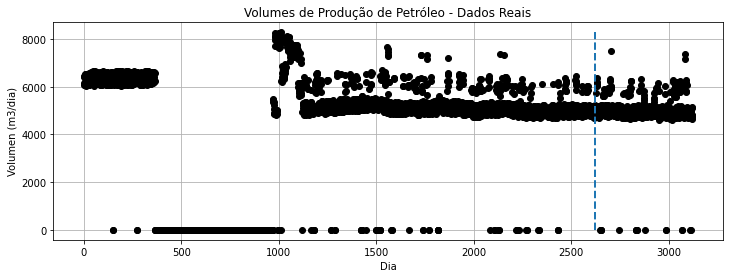

In [79]:
plt.figure(figsize=(12,4))
plt.plot(data, "ok")
plt.grid()
plt.plot([len(data)-500, len(data)-500], [min(data), max(data)], "--", linewidth=2 )
plt.title('Volumes de Produção de Petróleo - Dados Reais')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')

**Normalização dos dados**

In [52]:
scaler = MinMaxScaler()
data_scalet = scaler.fit_transform(np.array(data).reshape(-1,1))
data_scalet = [u[0] for u in data_scalet]

**Gráfico de produção de petróleo com dados normalizados**

Text(0, 0.5, 'Volumen (m3/dia)')

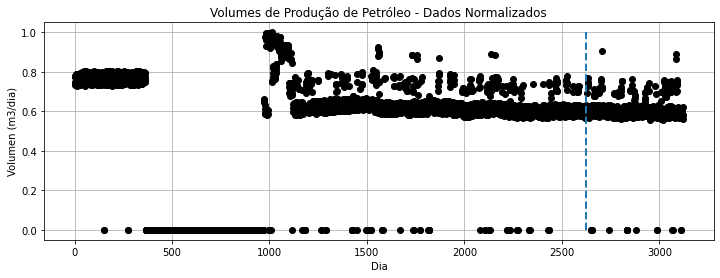

In [80]:
plt.figure(figsize=(12,4))
plt.plot(data_scalet, "ok")
plt.grid()
plt.plot([len(data_scalet)-500, len(data_scalet)-500], [min(data_scalet), max(data_scalet)], "--", linewidth=2 )
plt.title('Volumes de Produção de Petróleo - Dados Normalizados')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')

**Sequenciamento de dados**

In [54]:
P = 100

X = []
for t in range(P-1, 3123 - 1):
    aux = [data_scalet[t-n] for n in range(P)]
    L = [aux[i] for i in range(len(aux)-1, -1, -1)]
    X.append(L)

observed_scalet= data_scalet[P:]

In [55]:
datadf = pd.concat([pd.DataFrame(X), pd.DataFrame(observed_scalet, columns=['target'])], axis= 1)
datadf

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,target
0,0.733192,0.778277,0.742181,0.773970,0.745782,0.779495,0.789725,0.735240,0.748826,0.738126,...,0.735298,0.778077,0.767543,0.769935,0.736983,0.767805,0.755218,0.739199,0.801927,0.748287
1,0.778277,0.742181,0.773970,0.745782,0.779495,0.789725,0.735240,0.748826,0.738126,0.780688,...,0.778077,0.767543,0.769935,0.736983,0.767805,0.755218,0.739199,0.801927,0.748287,0.754324
2,0.742181,0.773970,0.745782,0.779495,0.789725,0.735240,0.748826,0.738126,0.780688,0.730569,...,0.767543,0.769935,0.736983,0.767805,0.755218,0.739199,0.801927,0.748287,0.754324,0.790812
3,0.773970,0.745782,0.779495,0.789725,0.735240,0.748826,0.738126,0.780688,0.730569,0.732247,...,0.769935,0.736983,0.767805,0.755218,0.739199,0.801927,0.748287,0.754324,0.790812,0.739162
4,0.745782,0.779495,0.789725,0.735240,0.748826,0.738126,0.780688,0.730569,0.732247,0.734429,...,0.736983,0.767805,0.755218,0.739199,0.801927,0.748287,0.754324,0.790812,0.739162,0.765569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,0.599607,0.565844,0.570684,0.708590,0.692911,0.759479,0.750459,0.571820,0.610517,0.569688,...,0.587308,0.582788,0.000000,0.000000,0.605799,0.567802,0.602630,0.601353,0.568866,0.618890
3019,0.565844,0.570684,0.708590,0.692911,0.759479,0.750459,0.571820,0.610517,0.569688,0.699722,...,0.582788,0.000000,0.000000,0.605799,0.567802,0.602630,0.601353,0.568866,0.618890,0.562889
3020,0.570684,0.708590,0.692911,0.759479,0.750459,0.571820,0.610517,0.569688,0.699722,0.676419,...,0.000000,0.000000,0.605799,0.567802,0.602630,0.601353,0.568866,0.618890,0.562889,0.581158
3021,0.708590,0.692911,0.759479,0.750459,0.571820,0.610517,0.569688,0.699722,0.676419,0.707763,...,0.000000,0.605799,0.567802,0.602630,0.601353,0.568866,0.618890,0.562889,0.581158,0.580743


**Conjunto de dados**

In [56]:
np.random.seed(123456)

In [57]:
X_train = X[0:2623]
Y_train =  observed_scalet[0:2623]

**Modelo e treinamento**

In [58]:
X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train).fit()

**Previçoes**

In [59]:
X = sm.add_constant(X)
pred = model.predict(X)

**Resultados e indicadores**

In [60]:
test_set_mae = mean_absolute_error(observed_scalet, pred)
test_set_mse = mean_squared_error(observed_scalet, pred)
test_set_rmse = np.sqrt(mean_squared_error(observed_scalet, pred))
expl_var_Y = explained_variance_score(observed_scalet, pred)

print('MAE: ', test_set_mae)
print('MSE: ', test_set_mse)
print('RMSE: ', test_set_rmse)
print('EVS: ', expl_var_Y)

MAE:  0.04591965568777704
MSE:  0.009908215390367646
RMSE:  0.09954001903941774
EVS:  0.8798981000133902


In [61]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     211.2
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:20:30   Log-Likelihood:                 2348.9
No. Observations:                2623   AIC:                            -4496.
Df Residuals:                    2522   BIC:                            -3903.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0081      0.004      1.924      0.0

## Diagnostico e avaliação do modelo

**Explicação da Variância pelo Modelo**

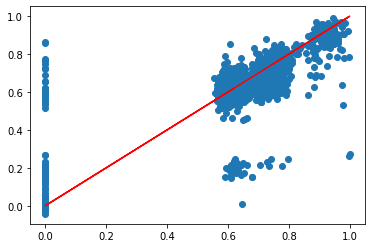

In [62]:
plt.figure(figsize=(6,4))
plt.scatter(observed_scalet,pred)
plt.plot(observed_scalet,observed_scalet,'r')

In [63]:
residualsrm1 = model.resid
fitted_value1 = model.fittedvalues
model_norm_residuals1 = model.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt1 = np.sqrt(np.abs(model_norm_residuals1))
model_abs_resid1 = np.abs(residualsrm1)
influence1 = model.get_influence()
leverage1 = influence1.hat_matrix_diag

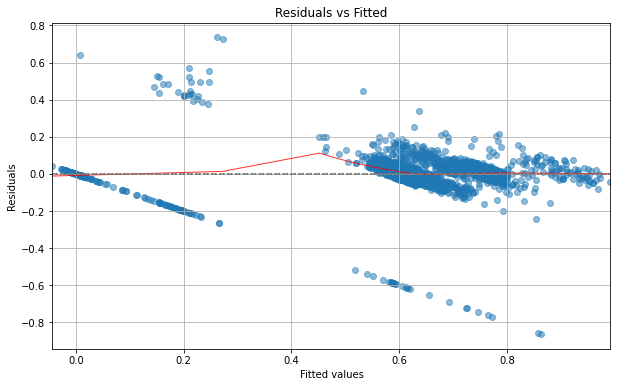

In [64]:
plt.figure(figsize=(10,6))
sns.residplot(x=fitted_value1, y=residualsrm1, lowess=True,
scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.axhline(y=0, color='grey', linestyle='dashed')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.grid()
plt.show()


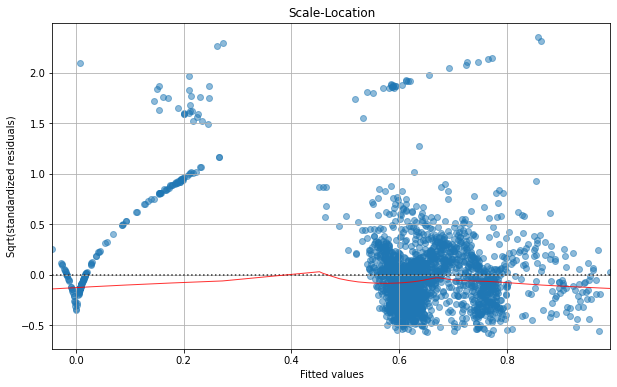

In [65]:
ax = plt.figure(figsize=(10,6))
sns.residplot(x=fitted_value1, y=model_norm_residuals_abs_sqrt1, lowess=True,
scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(standardized residuals)')
plt.grid()
plt.show()


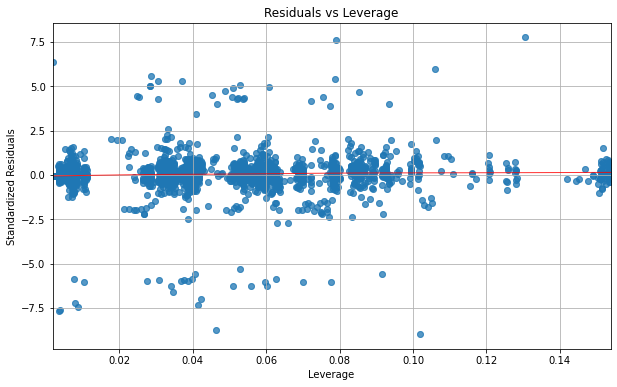

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(x=leverage1, y=model_norm_residuals1, alpha=0.5)
sns.regplot(x=leverage1,y= model_norm_residuals1, lowess=True,
scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.grid()
plt.show()

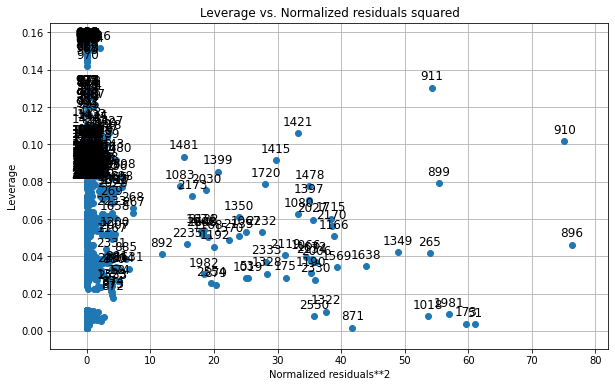

In [67]:
plt.rc("figure", figsize=(10, 6))
fig = sm.graphics.plot_leverage_resid2(model)
plt.grid()

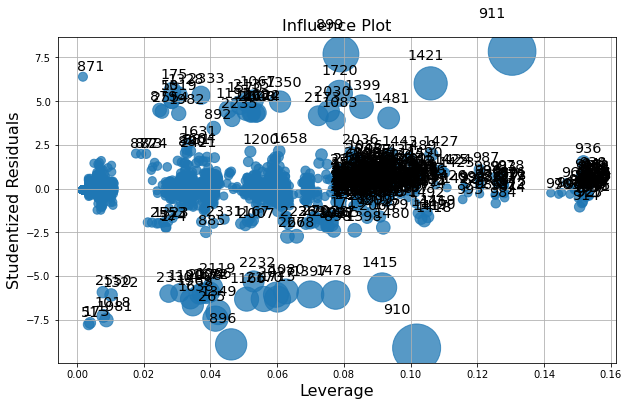

In [68]:
fig = sm.graphics.influence_plot(model, criterion="cooks")
plt.grid()

## Previções

**Gráfico do conjunto de dados com previçoes**

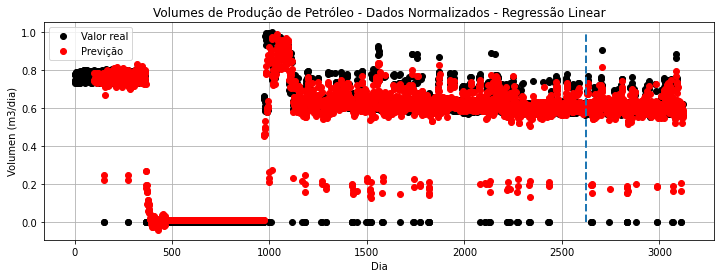

In [82]:
plt.figure(figsize=(12,4))
plt.plot(data_scalet, "ok")
plt.grid()
plt.plot([None] * P + pred.tolist(),"or")
plt.plot([len(data_scalet)-500, len(data_scalet)-500], [min(data_scalet), max(data_scalet)], "--", linewidth=2 )
plt.title('Volumes de Produção de Petróleo - Dados Normalizados - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend(['Valor real', 'Previção'])

**Transformação inversa de dados**

In [70]:
ym = scaler.inverse_transform([[u] for u in pred])
ym =[u[0] for u in ym]

In [71]:
observed = scaler.inverse_transform([[u] for u in observed_scalet])
observed =[u[0] for u in observed]

**Gráfico de dados com suas previçoes (valores reais)**

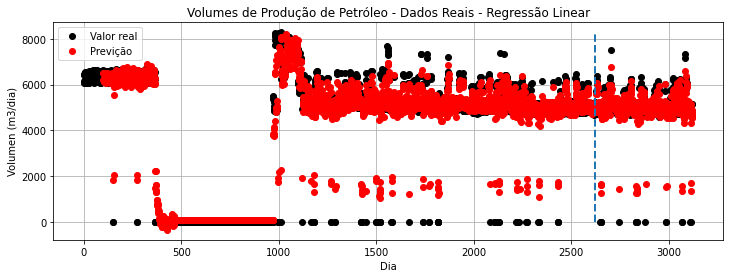

In [81]:
plt.figure(figsize=(12,4))
plt.plot(data, "ok")
plt.grid()
plt.plot([None] * P + ym,"or")
plt.plot([len(data)-500, len(data)-500], [min(data), max(data)], "--", linewidth=2 )
plt.title('Volumes de Produção de Petróleo - Dados Reais - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend(['Valor real', 'Previção'])

In [73]:
dataSeriedf = pd.concat([pd.DataFrame(observed, columns=['real']), pd.DataFrame(ym, columns=['pred'])], axis = 1)

In [74]:
dataSeriedf

,real,pred
0,6200.376900,6523.196045
1,6250.402251,6210.962493
2,6552.748635,6169.751525
3,6124.770458,6504.042337
4,6343.576606,6115.806990
...,...,...
3018,5128.181653,4518.625116
3019,4664.154912,4873.990224
3020,4815.533061,4688.622952
3021,4812.097524,4582.607170


In [75]:
dataSeriedf.to_csv('dataSerieRLdf.csv', index=False)